In [51]:
from __future__ import print_function

import keras
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import plot_model

In [52]:
batch_size = 128
num_classes = 10
epochs = 20
img_size = 28
num_pixels = 784

In [3]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [7]:
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [8]:
print(y_train)

[5 0 4 ... 5 6 8]


In [9]:
print(y_train[0])

5


In [10]:
print(len(y_train))

60000


In [11]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
# Build model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.2431 - acc: 0.9260 - val_loss: 0.1303 - val_acc: 0.9599
Epoch 2/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1035 - acc: 0.9687 - val_loss: 0.0969 - val_acc: 0.9708
Epoch 3/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0741 - acc: 0.9774 - val_loss: 0.0913 - val_acc: 0.9753
Epoch 4/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0612 - acc: 0.9823 - val_loss: 0.0703 - val_acc: 0.9805
Epoch 5/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.0508 - acc: 0.9851 - val_loss: 0.0729 - val_acc: 0.9808
Epoch 6/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0450 - acc: 0.9864 - val_loss: 0.0712 - val_acc: 0.9800
Epoch 7/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0371 - acc: 0.9888 - val_loss: 0.0760 - val_acc

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)

In [17]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10917370248224402
Test accuracy: 0.9832


In [29]:
out = model.predict(x_1)
print(out)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 5.6475468e-13 0.0000000e+00
  1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0929724e-31]]


In [27]:
import numpy as np

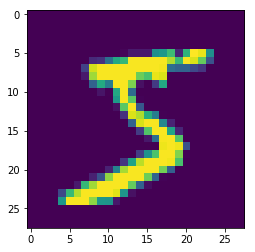

In [33]:
plt.show()

In [56]:
def predict_and_display(x_test, num_samples=10):
    rand_indices = random.sample(range(x_test.shape[0]), num_samples)
    for index in rand_indices:
        plt.imshow(x_test[index].reshape(img_size, img_size))
        plt.show()
        flat_img = x_test[index].reshape(1, num_pixels)
        predicted = np.argmax(model.predict(flat_img))
        print("PREDICTED LABEL: " + str(predicted))

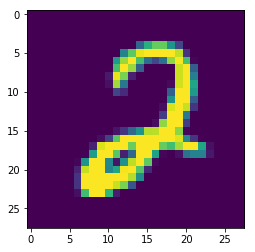

PREDICTED LABEL: 2


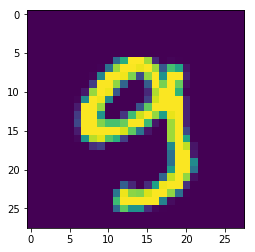

PREDICTED LABEL: 9


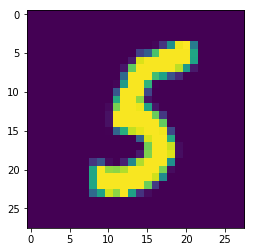

PREDICTED LABEL: 5


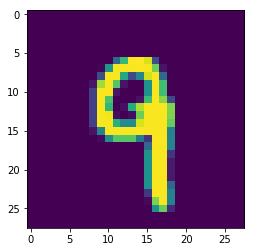

PREDICTED LABEL: 9


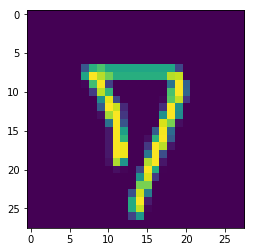

PREDICTED LABEL: 7


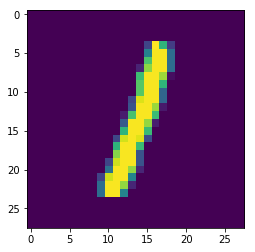

PREDICTED LABEL: 1


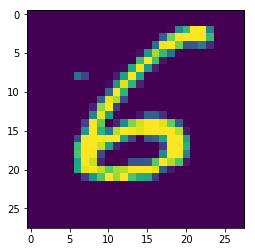

PREDICTED LABEL: 6


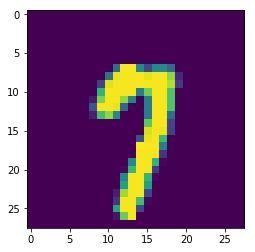

PREDICTED LABEL: 7


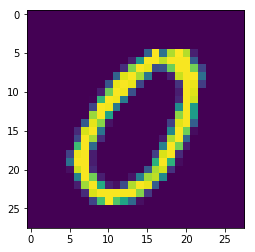

PREDICTED LABEL: 0


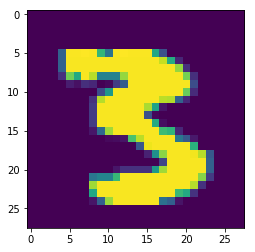

PREDICTED LABEL: 3


In [58]:
predict_and_display(x_test)